### Datos de: Evaluación de la relación entre la calidad de vida y la activación conductual utilizando la escala japonesa de activación conductual para la depresión (formato corto)

El conjunto de datos contiene las siguientes columnas relacionadas con medidas demográficas, psicológicas y de calidad de vida:

$\textbf{Sex}$: Sexo del participante.


$\textbf{Age:}$ Edad del participante.


$\textbf{BADS-SF y subcomponentes:}$ Medidas relacionadas con activación y evitación.


$\textbf{CES-D:}$ Una puntuación (probablemente de depresión).


$\textbf{WHOQOL-26 y subcomponentes:}$ Medidas relacionadas con la calidad de vida (salud física, psicológica, relaciones sociales, etc.).


Para facilitar la visualización de los datos es conveniente asociarlos para su comparación 


    Distribución de edad y sexo.
    Correlaciones entre variables psicológicas y de calidad de vida. 
    Gráficos comparativos de calidad de vida según sexo.
    Histogramas de las principales variables cuantitativas.

$\textbf{Distribución de Edad y Sexo:}$

*Histograma de edades con densidad.

*Gráfico de barras para la distribución por sexo.

$\textbf{Matriz de Correlación:}$

*Muestra las relaciones lineales entre las variables psicológicas y de calidad de vida.

$\textbf{Comparación de Calidad de Vida por Sexo:}$

*Diagrama de cajas para las puntuaciones de calidad de vida divididas por sexo.

$\textbf{Histogramas de Variables Clave:}$

*Muestra las distribuciones de las principales variables psicológicas y de calidad de vida.

c:\Python3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Hp\AppData\Local\Temp\ipykernel_16348\1296488662.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_labels, y=sex_counts, palette="pastel")


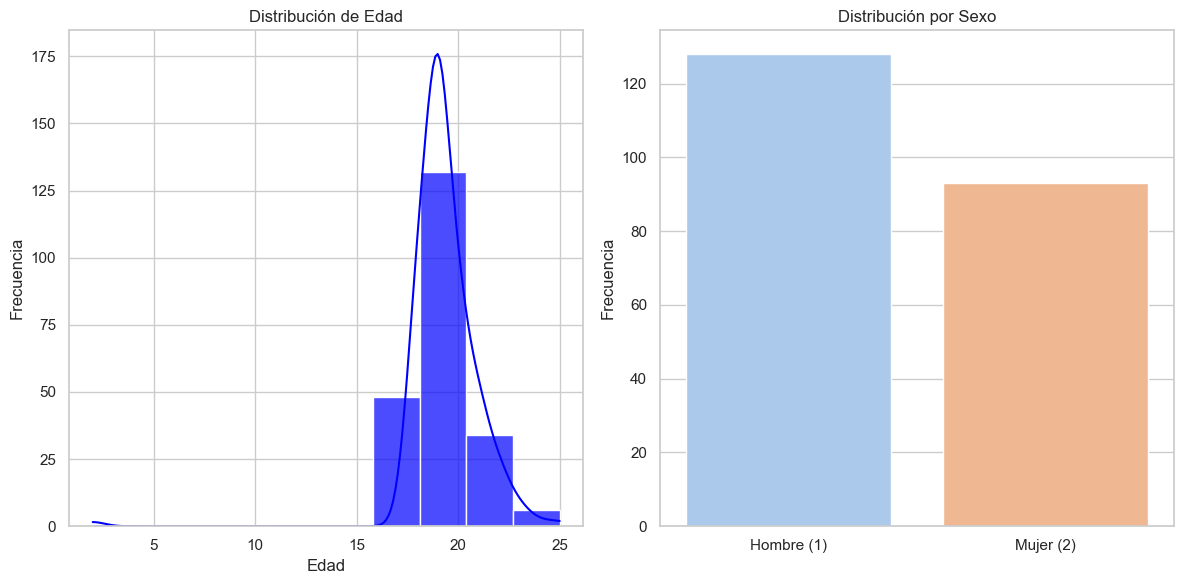

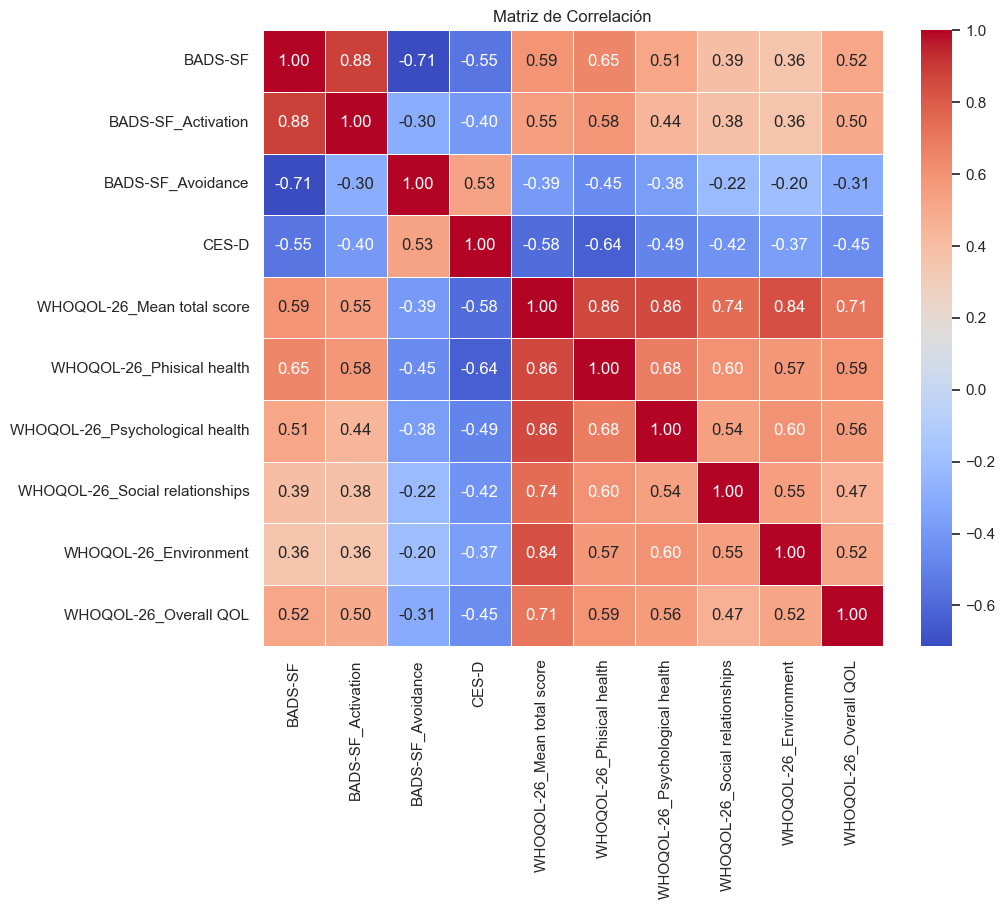

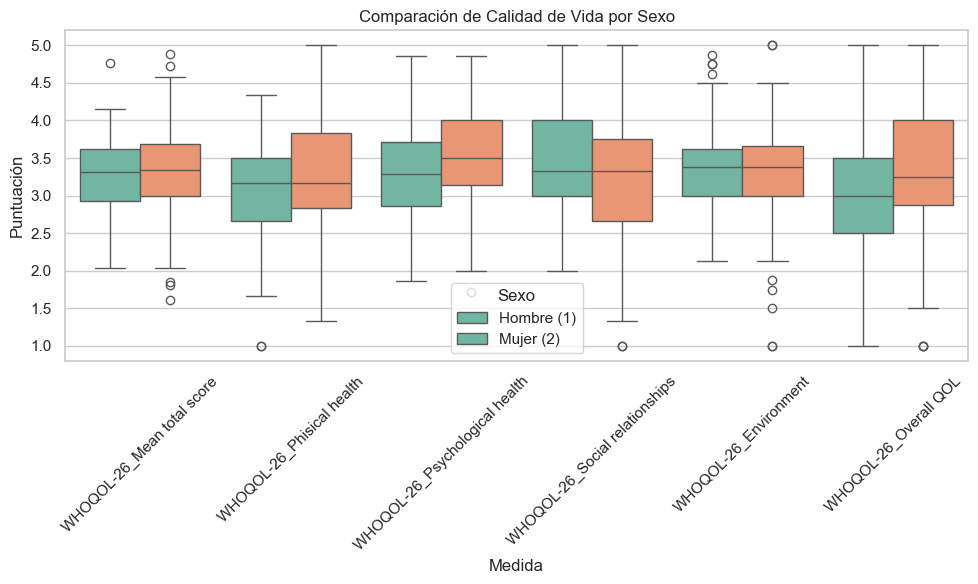

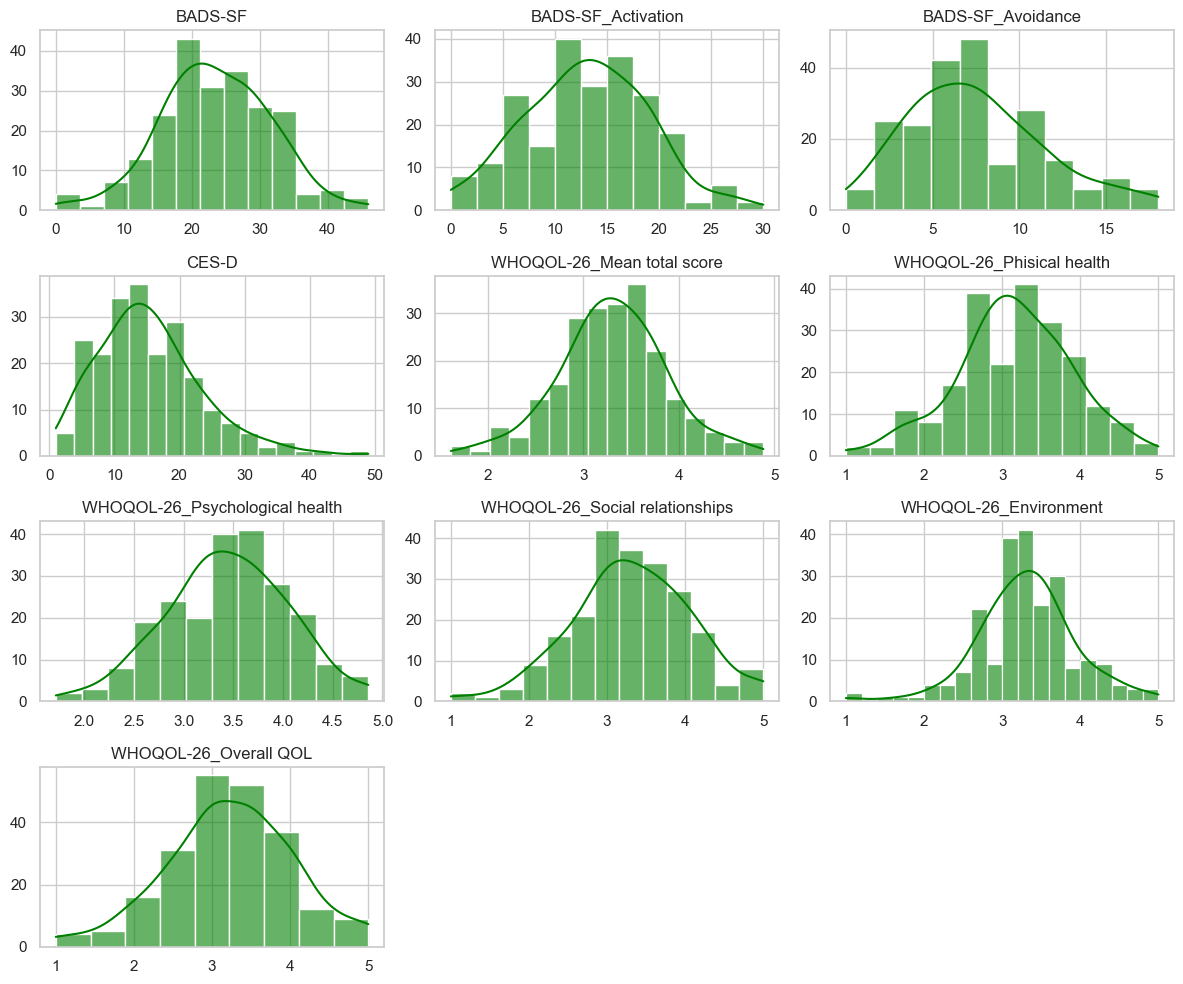

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = pd.read_excel(r'C:\Users\Hp\Desktop\SSF-Oto24PatriciaTitlaPerez\S1_Dataset.xlsx')

# Configuración de estilo para gráficos
sns.set(style="whitegrid", context="notebook")

# 1. Distribución de edad y sexo
plt.figure(figsize=(12, 6))

# Distribución de edad
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=10, kde=True, color="blue", alpha=0.7)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Distribución de sexo
plt.subplot(1, 2, 2)
sex_counts = data['Sex'].value_counts()
sex_labels = ["Hombre (1)", "Mujer (2)"]
sns.barplot(x=sex_labels, y=sex_counts, palette="pastel")
plt.title("Distribución por Sexo")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# 2. Matriz de correlación entre variables psicológicas y calidad de vida
correlation_columns = ['BADS-SF', 'BADS-SF_Activation', 'BADS-SF_Avoidance',
                       'CES-D', 'WHOQOL-26_Mean total score', 'WHOQOL-26_Phisical health',
                       'WHOQOL-26_Psychological health', 'WHOQOL-26_Social relationships',
                       'WHOQOL-26_Environment', 'WHOQOL-26_Overall QOL']
correlation_matrix = data[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# 3. Comparación de calidad de vida por sexo
plt.figure(figsize=(10, 6))
qol_columns = ['WHOQOL-26_Mean total score', 'WHOQOL-26_Phisical health',
               'WHOQOL-26_Psychological health', 'WHOQOL-26_Social relationships',
               'WHOQOL-26_Environment', 'WHOQOL-26_Overall QOL']

melted_data = data[['Sex'] + qol_columns].melt(id_vars=['Sex'], var_name='Medida', value_name='Puntuación')
sns.boxplot(data=melted_data, x='Medida', y='Puntuación', hue='Sex', palette="Set2")
plt.title("Comparación de Calidad de Vida por Sexo")
plt.xticks(rotation=45)
plt.legend(title="Sexo", labels=["Hombre (1)", "Mujer (2)"])
plt.tight_layout()
plt.show()

# 4. Histogramas de las principales variables
plt.figure(figsize=(12, 10))
for i, column in enumerate(correlation_columns, start=1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, color="green", alpha=0.6)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()
